Этап 1: Подготовка данных
Dataset prepared:
Train: 1248676 samples
Validation: 156085 samples
Test: 156085 samples
Этап 2: Обучение модели LSTM


Evaluating LSTM: 100%|██████████| 544/544 [01:56<00:00,  4.68it/s]


Epoch 1:
  Train Loss: 5.6814
  Val ROUGE-1: 0.0754
  Val ROUGE-2: 0.0021
  Example predictions:
    Input: a missed reason late that
    Pred: isn t a funny teacher like me but now its
    Target: na bright little a seeing from them night 1 my

    Input: missed reason late that tough
    Pred: i slept into not come in them in an cd
    Target: bright little a seeing from them night 1 my coffee



Evaluating LSTM: 100%|██████████| 544/544 [01:56<00:00,  4.68it/s]


Epoch 2:
  Train Loss: 5.1643
  Val ROUGE-1: 0.0773
  Val ROUGE-2: 0.0021
  Example predictions:
    Input: a missed reason late that
    Pred: to my best works due to my hair i ve
    Target: na bright little a seeing from them night 1 my

    Input: missed reason late that tough
    Pred: too no i ll be the coz of the mail
    Target: bright little a seeing from them night 1 my coffee



Evaluating LSTM: 100%|██████████| 544/544 [01:56<00:00,  4.67it/s]


Epoch 3:
  Train Loss: 4.9838
  Val ROUGE-1: 0.0787
  Val ROUGE-2: 0.0022
  Example predictions:
    Input: a missed reason late that
    Pred: i feel like my hood amp yay they ll show
    Target: na bright little a seeing from them night 1 my

    Input: missed reason late that tough
    Pred: one want to go well while i can fall away
    Target: bright little a seeing from them night 1 my coffee



Evaluating LSTM: 100%|██████████| 544/544 [01:56<00:00,  4.67it/s]


Epoch 4:
  Train Loss: 4.8869
  Val ROUGE-1: 0.0766
  Val ROUGE-2: 0.0021
  Example predictions:
    Input: a missed reason late that
    Pred: doesn t make the back in good here on saturday
    Target: na bright little a seeing from them night 1 my

    Input: missed reason late that tough
    Pred: year amp finding my result into tummy check help back
    Target: bright little a seeing from them night 1 my coffee



Evaluating LSTM: 100%|██████████| 544/544 [01:56<00:00,  4.68it/s]


Epoch 5:
  Train Loss: 4.8279
  Val ROUGE-1: 0.0778
  Val ROUGE-2: 0.0021
  Example predictions:
    Input: a missed reason late that
    Pred: s that i guess it turned back always easier to
    Target: na bright little a seeing from them night 1 my

    Input: missed reason late that tough
    Pred: stalk me tonight it was a blast and it makes
    Target: bright little a seeing from them night 1 my coffee



Evaluating LSTM: 100%|██████████| 544/544 [01:56<00:00,  4.68it/s]


Epoch 6:
  Train Loss: 4.7869
  Val ROUGE-1: 0.0771
  Val ROUGE-2: 0.0022
  Example predictions:
    Input: a missed reason late that
    Pred: not great man don t feel about late <unk> btw
    Target: na bright little a seeing from them night 1 my

    Input: missed reason late that tough
    Pred: man gon na be the same soon on us it
    Target: bright little a seeing from them night 1 my coffee



Evaluating LSTM: 100%|██████████| 544/544 [01:56<00:00,  4.65it/s]


Epoch 7:
  Train Loss: 4.7563
  Val ROUGE-1: 0.0781
  Val ROUGE-2: 0.0020
  Example predictions:
    Input: a missed reason late that
    Pred: <unk> romance but what questions else has the money to
    Target: na bright little a seeing from them night 1 my

    Input: missed reason late that tough
    Pred: thing probably can have my energy <unk> yes i cant
    Target: bright little a seeing from them night 1 my coffee



Evaluating LSTM: 100%|██████████| 544/544 [01:56<00:00,  4.65it/s]


Epoch 8:
  Train Loss: 4.7319
  Val ROUGE-1: 0.0792
  Val ROUGE-2: 0.0021
  Example predictions:
    Input: a missed reason late that
    Pred: can t wait to see the tennis hack video i
    Target: na bright little a seeing from them night 1 my

    Input: missed reason late that tough
    Pred: absolutely mellow a good day out sleep love serious <unk>
    Target: bright little a seeing from them night 1 my coffee



Evaluating LSTM: 100%|██████████| 544/544 [01:57<00:00,  4.64it/s]


Epoch 9:
  Train Loss: 4.7123
  Val ROUGE-1: 0.0779
  Val ROUGE-2: 0.0019
  Example predictions:
    Input: a missed reason late that
    Pred: he won t be attending all we re going downtown
    Target: na bright little a seeing from them night 1 my

    Input: missed reason late that tough
    Pred: chance we re waiting for the warm bank cup i
    Target: bright little a seeing from them night 1 my coffee



Evaluating LSTM: 100%|██████████| 544/544 [01:55<00:00,  4.69it/s]


Epoch 10:
  Train Loss: 4.6960
  Val ROUGE-1: 0.0781
  Val ROUGE-2: 0.0020
  Example predictions:
    Input: a missed reason late that
    Pred: is my favorite movie ever at least they dnt <unk>
    Target: na bright little a seeing from them night 1 my

    Input: missed reason late that tough
    Pred: let me know that bd we re sick as my
    Target: bright little a seeing from them night 1 my coffee



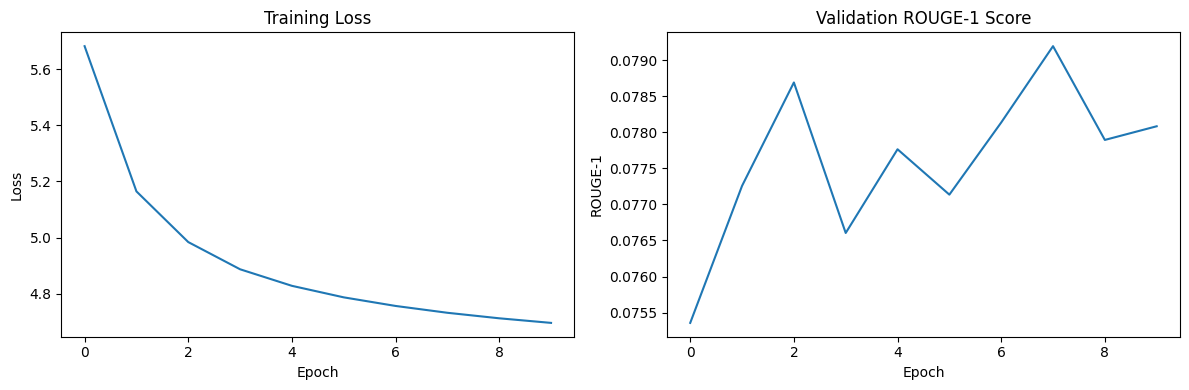

Этап 3: Оценка модели LST


Evaluating LSTM: 100%|██████████| 541/541 [01:54<00:00,  4.71it/s]


LSTM Test Results:
ROUGE-1: 0.0777
ROUGE-2: 0.0019
Этап 4: Оценка модели Transformer


Device set to use cuda:0
Evaluating Transformer:   0%|          | 0/100 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=12) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Evaluating Transformer:   1%|          | 1/100 [00:01<01:56,  1.18s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=21) seem to have been set. `

Transformer Results:
ROUGE-1: 0.0264
ROUGE-2: 0.0009

Examples:
Example 1:
  Input: school before it s not
  Pred: in its time. The fact that the school has been
  Target: that bad really

Example 2:
  Input: sufi family love you all
  Pred: i know you love you all i know you love
  Target: sweet dreams of dane xoxoxox

Example 3:
  Input: qualified plumber amp earn â
  Pred: €‬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬‬¬¬¬¬¬¬¬¬ ¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬¬�
  Target: â â â â â

Example 4:
  Input: because of the lovely yu
  Pred: /s bright sunshine. - Yu-o-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi - Yi-o-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-yi-
  Target: na zz english is a difficult

Example 5:
  Input: i really really really want
  Pred: to be able to play around with your friends that

In [2]:
import sys
import os
sys.path.append('/home/ubuntu/text-autocomplete/src')

import torch
import pandas as pd
import numpy as np
from data_utils import prepare_dataset
from next_token_dataset import NextTokenDataset
from lstm_model import LSTMAutoComplete
from lstm_train import train_model
from eval_lstm import calculate_rouge_lstm
from eval_transformer_pipeline import evaluate_transformer
from torch.utils.data import DataLoader

print("Этап 1: Подготовка данных")
train_df, val_df, test_df = prepare_dataset(
    "/home/ubuntu/text-autocomplete/data/tweets.txt",
    "/home/ubuntu/text-autocomplete/data"
)

print("Этап 2: Обучение модели LSTM")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_dataset = NextTokenDataset('/home/ubuntu/text-autocomplete/data/train.csv')
val_dataset = NextTokenDataset('/home/ubuntu/text-autocomplete/data/val.csv')

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False)

model = LSTMAutoComplete(
    vocab_size=train_dataset.vocab_size,
    embedding_dim=128,
    hidden_dim=128,
    num_layers=2
).to(device)

trained_model, train_losses, val_rouge_scores = train_model(
    model, train_loader, val_loader, train_dataset.vocab, device
)

print("Этап 3: Оценка модели LST")
test_dataset = NextTokenDataset('/home/ubuntu/text-autocomplete/data/test.csv')
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

rouge1_lstm, rouge2_lstm, lstm_examples = calculate_rouge_lstm(
    trained_model, test_loader, train_dataset.vocab, device
)

print(f"LSTM Test Results:")
print(f"ROUGE-1: {rouge1_lstm:.4f}")
print(f"ROUGE-2: {rouge2_lstm:.4f}")

print("Этап 4: Оценка модели Transformer")
rouge1_transformer, rouge2_transformer, transformer_examples = evaluate_transformer()

print("Этап 5: Сравнение и выводы")

print("\nСравнение результатов")
print(f"LSTM Model:")
print(f"  ROUGE-1: {rouge1_lstm:.4f}")
print(f"  ROUGE-2: {rouge2_lstm:.4f}")

print(f"\nTransformer Model (distilgpt2):")
print(f"  ROUGE-1: {rouge1_transformer:.4f}")
print(f"  ROUGE-2: {rouge2_transformer:.4f}")

print("\nПример сравнения")
print("LSTM Examples:")
for i, (input_tokens, pred_tokens, target_tokens) in enumerate(lstm_examples[:2]):
    print(f"Example {i+1}:")
    print(f"  Input: {' '.join(input_tokens)}")
    print(f"  Pred: {' '.join(pred_tokens)}")
    print(f"  Target: {' '.join(target_tokens)}")
    print()

print("Transformer Examples:")
for i, (input_tokens, pred_tokens, target_tokens) in enumerate(transformer_examples[:2]):
    print(f"Example {i+1}:")
    print(f"  Input: {' '.join(input_tokens[-5:])}")
    print(f"  Pred: {' '.join(pred_tokens)}")
    print(f"  Target: {' '.join(target_tokens[:10])}")
    print()

print("\nРекомендации")
if rouge1_transformer > rouge1_lstm:
    print("Модель Transformer показывает лучшие результаты по показателям ROUGE.")
    print("Рекомендация: Используйте модель Transformer, если позволяют ограничения памяти.")
else:
    print("Модель LSTM демонстрирует конкурентные характеристики.")
    print("Рекомендация: Используйте модель LSTM для повышения эффективности использования памяти на мобильных устройствах.")